In [1]:
import pandas as pd

In [2]:
data1=pd.read_csv('d1.csv')
data2=pd.read_csv('d2.csv')
data3=pd.read_csv('d3.csv')

In [3]:
data=pd.concat([data1,data3,data2])

In [4]:
data.head()

,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,...,famrel,freetime,goout,Ddrug,Wdrug,health,absences,G1,G2,G3
0,0,0,0,1,3,3,0,4,1,3,...,5,1,5,1,1,4,0,14,16,17
1,0,0,0,1,4,4,3,4,1,3,...,5,4,3,1,1,4,2,18,18,18
2,0,1,1,1,4,4,2,1,1,3,...,5,4,2,1,1,4,0,15,17,16
3,0,0,1,1,4,2,2,4,1,2,...,5,5,5,1,1,5,10,20,19,20
4,0,1,0,1,3,4,2,2,2,4,...,5,5,5,5,4,5,4,20,20,20


In [8]:
data.to_csv('Grades_prediction.csv',index=False)


In [9]:
data.columns

Index(['sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'peer pressure', 'famrel', 'freetime', 'goout', 'Ddrug', 'Wdrug',
       'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1165 entries, 0 to 394
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   sex            1165 non-null   int64
 1   address        1165 non-null   int64
 2   famsize        1165 non-null   int64
 3   Pstatus        1165 non-null   int64
 4   Medu           1165 non-null   int64
 5   Fedu           1165 non-null   int64
 6   Mjob           1165 non-null   int64
 7   Fjob           1165 non-null   int64
 8   guardian       1165 non-null   int64
 9   traveltime     1165 non-null   int64
 10  studytime      1165 non-null   int64
 11  failures       1165 non-null   int64
 12  schoolsup      1165 non-null   int64
 13  famsup         1165 non-null   int64
 14  paid           1165 non-null   int64
 15  activities     1165 non-null   int64
 16  nursery        1165 non-null   int64
 17  higher         1165 non-null   int64
 18  internet       1165 non-null   int64
 19  peer pressur

In [11]:
totalmarks=60
data['GAvg']=((data['G1']+data['G2']+data['G3'])/totalmarks)*100

In [12]:
#now calculate grade according to percentage
def grade(data):
    grades=[]
    for i in data['GAvg']:
        if i >= 80:
            grades.append('A')
        elif i >= 70:
            grades.append('B')
        elif i >= 60:
            grades.append('C')
        elif i > 50:
            grades.append('D')
        else:
            grades.append('F')

    data['grades']=grades
    return data

In [13]:
data=grade(data)
data['grades'].value_counts()

grades
F    383
C    248
D    213
B    169
A    152
Name: count, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [15]:
y = data['grades']
x= data.drop(['grades','G3','GAvg'], axis=1)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=56)

In [29]:
classifier=RandomForestClassifier(n_estimators=100,criterion='gini')
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [30]:
prediction=classifier.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,prediction)
accuracy*100

83.76068376068376

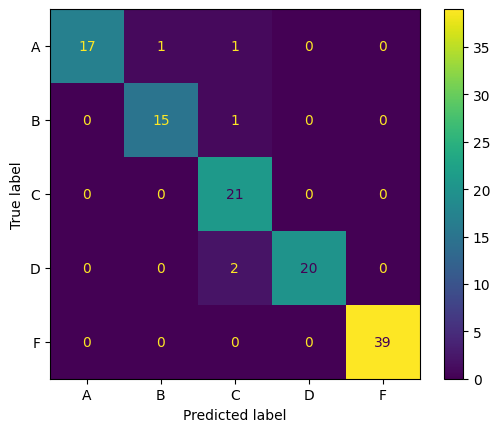

In [182]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, x_test, y_test)

In [190]:
import joblib
joblib.dump(classifier,'up_student_grade_model.joblib')

['up_student_grade_model.joblib']

In [18]:
y_test

252    C
34     C
224    C
374    A
567    F
      ..
197    F
67     F
30     D
229    D
80     A
Name: grades, Length: 117, dtype: object

In [19]:
y_test.value_counts()

grades
F    39
D    22
C    21
A    19
B    16
Name: count, dtype: int64